## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('RL_EXAM_10.csv', sep=",")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for Gender in char_var:
        f = pd.factorize(x[Gender])
        x[Gender] = pd.factorize(x[Gender])[0]
    return(x)


# Encoding categorical data
df = encoding_char(df)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [8]:
df.describe()
# Критических выбросов не наблюдается

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [10]:
# mean()-3*std
# Let's check how much the data are spread out from the mean.
mean_User_ID = np.mean(df['User ID'], axis=0)
sd_User_ID = np.std(df['User ID'], axis=0)

mean_Gender = np.mean(df['Gender'], axis=0)
sd_Gender = np.std(df['Gender'], axis=0)

mean_Age = np.mean(df['Age'], axis=0)
sd_Age = np.std(df['Age'], axis=0)

mean_EstimatedSalary = np.mean(df['EstimatedSalary'], axis=0)
sd_EstimatedSalary = np.std(df['EstimatedSalary'], axis=0)

mean_Purchased = np.mean(df['Purchased'], axis=0)
sd_Purchased = np.std(df['Purchased'], axis=0)

counter_User_ID = 0
counter_Gender = 0
counter_Age = 0
counter_EstimatedSalary = 0
counter_Purchased = 0

for User_ID, Gender, Age, EstimatedSalary, Purchased in zip(df['User ID'], df['Gender'], df['Age'], df['EstimatedSalary'], df['Purchased']):
    if not mean_User_ID - 3*sd_User_ID <= User_ID <= mean_User_ID + 3*sd_User_ID:
        counter_User_ID += 1
    if not mean_Gender - 3*sd_Gender <= Gender <= mean_Gender + 3*sd_Gender:
        counter_Gender += 1
    if not mean_Age - 3*sd_Age <= counter_Age <= mean_Age + 3*sd_Age:
        counter_Age += 1
    if not mean_EstimatedSalary - 3*sd_EstimatedSalary <= counter_EstimatedSalary <= mean_EstimatedSalary + 3*sd_EstimatedSalary:
        counter_EstimatedSalary += 1
    if not mean_Purchased - 3*sd_Purchased <= counter_Purchased <= mean_Purchased + 3*sd_Purchased:
        counter_Purchased += 1

counter_dicts = {'counter_User_ID': counter_User_ID,
                'counter_Gender': counter_Gender,
                'counter_Age': counter_Age,
                'counter_EstimatedSalary': counter_EstimatedSalary,
                'counter_Purchased': counter_Purchased}
print(counter_dicts)

{'counter_User_ID': 0, 'counter_Gender': 0, 'counter_Age': 7, 'counter_EstimatedSalary': 0, 'counter_Purchased': 0}


In [11]:
# Outliers
User_ID = []
for ap in df['User ID']:
    if ap > df['User ID'].mean() + 3 * df['User ID'].std():
        ap = df['User ID'].mean() + 3*df['User ID'].std()
    elif ap < df['User ID'].mean() - 3 * df['User ID'].std():
        ap = df['User ID'].mean() - 3*df['User ID'].std()
    User_ID.append(ap)
df['User ID']  = User_ID

Gender = []
for m in df['Gender']:
    if m > df['Gender'].mean() + 3 * df['Gender'].std():
        m = df['Gender'].mean() + 3*df['Gender'].std()
    elif m < df['Gender'].mean() - 3 * df['Gender'].std():
        m = df['Gender'].mean() - 3*df['Gender'].std()
    Gender.append(m)
df['Gender']  = Gender

Age = []
for loc in df['Age']:
    if loc > df['Age'].mean() + 3 * df['Age'].std():
        loc = df['Age'].mean() + 3*df['Age'].std()
    elif loc < df['Age'].mean() - 3 * df['Age'].std():
        loc = df['Age'].mean() - 3*df['Age'].std()
    Age.append(loc)
df['Age'] = Age

EstimatedSalary = []
for loc in df['EstimatedSalary']:
    if loc > df['EstimatedSalary'].mean() + 3 * df['EstimatedSalary'].std():
        loc = df['EstimatedSalary'].mean() + 3*df['EstimatedSalary'].std()
    elif loc < df['EstimatedSalary'].mean() - 3 * df['EstimatedSalary'].std():
        loc = df['EstimatedSalary'].mean() - 3*df['EstimatedSalary'].std()
    EstimatedSalary.append(loc)
df['EstimatedSalary'] = EstimatedSalary

Purchased = []
for loc in df['Purchased']:
    if loc > df['Purchased'].mean() + 3 * df['Purchased'].std():
        loc = df['Purchased'].mean() + 3*df['Purchased'].std()
    elif loc < df['Purchased'].mean() - 3 * df['Purchased'].std():
        loc = df['Purchased'].mean() - 3*df['Purchased'].std()
    Purchased.append(loc)
df['Purchased'] = Purchased

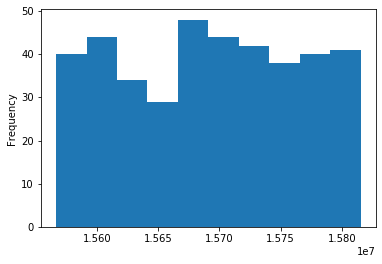

In [12]:
# User_ID distribution
df['User ID'].plot(kind = 'hist')

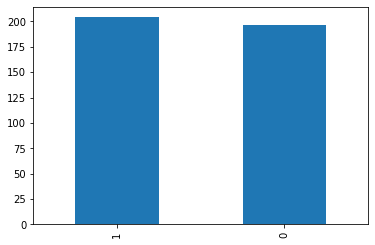

In [13]:
# Gender distribution
distribution = df['Gender'].value_counts()
distribution.plot(kind='bar')

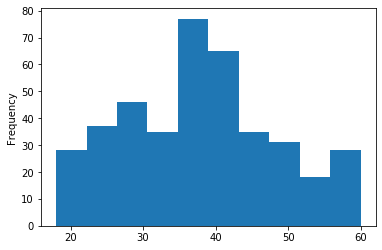

In [14]:
# Age distribution
df['Age'].plot(kind = 'hist')

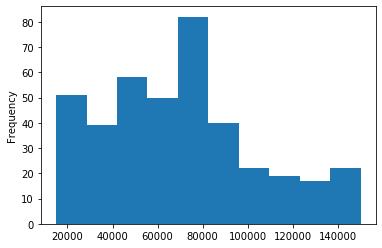

In [15]:
# EstimatedSalary distribution
df['EstimatedSalary'].plot(kind = 'hist')

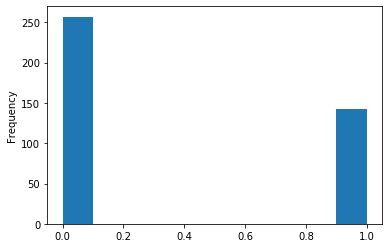

In [16]:
# Purchased distribution
df['Purchased'].plot(kind = 'hist')

In [17]:
df.isnull().sum()
# Таким образом мы имеем пропущенные значения в таких колонках:

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
# Taking care of missing data
# https://scikit-learn.org/
from sklearn.impute import SimpleImputer
#numeric
df[['User ID']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['User ID']]).round()
df[['Gender']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Gender']]).round()
df[['EstimatedSalary']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['EstimatedSalary']]).round()

## Classification Tree

In [22]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0.0,19,19000.0,0
1,15810944.0,0.0,35,20000.0,0
2,15668575.0,1.0,26,43000.0,0
3,15603246.0,1.0,27,57000.0,0
4,15804002.0,0.0,19,76000.0,0
...,...,...,...,...,...
395,15691863.0,1.0,46,41000.0,1
396,15706071.0,0.0,51,23000.0,1
397,15654296.0,1.0,50,20000.0,1
398,15755018.0,0.0,36,33000.0,0


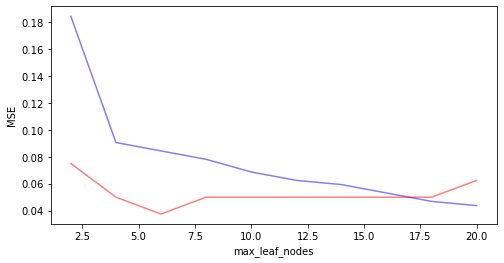

In [28]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

Выберем leaf_nodes = 17

In [29]:
# Fitting Classification Tree to the Training set
ct = DecisionTreeClassifier(max_leaf_nodes = 17, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.95

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  2]
 [ 2 20]]


Вывод: данная модель отлично подходит для целей прогнозирования, т.к. ее точность = 95%. Так же мы имеем 4 ложных предсказания.